In [1]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import statistics as st
from matplotlib.pyplot import figure

%matplotlib inline 

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# api_key = '00ef9804fcde0edd93b1b4821ee2f06a'
api_key = 'c81352430e2fe3c941faf0814227562b'

data

In [4]:

''' Колонки '''
ticker = 'F'
# ticker = 'AAPL'



''' для фильтрации'''
filt_start_date = '1999'
filt_finish_date = '2022'


''' время '''
stime=f'{str(int(filt_start_date)-1)}-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'

ticker and stock data

In [5]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = get_data_from_ticker(ticker, stime, None, period)
df_market = get_data_from_ticker('^GSPC', stime, None, period)
df.tail(3)

,F
Date,
2022-11-01 00:00:00-04:00,13.756207
2022-12-01 00:00:00-05:00,11.630000
2023-01-01 00:00:00-05:00,13.270000


change index to add in metriks df

In [6]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df_market  = change_index(df_market)
df.head(3)

,F
Date_index,
1998-01-01,8.822254
1998-02-01,9.867579
1998-03-01,11.306831


key_metrics

In [7]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr.head(3)

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
2021,FY,34.162115,4.494362,3.95565,2.39539,12.426209,12.157103,12,12.157103,36.717615,77984143591.899994,196929143591.899994,4.347669,0.571979,4.93977,8.157337,1.607291,1.607291,1.444387,6.38924,12.474133,20.599283,0.230008,0.122589,1.843566,0.810835,3.859094,1.201362,0.641106,0.880136,0.005168,0.022468,0,0,0.00284,-0.394438,-0.045672,-1.044799,0.002237,35.062296,0.027197,0.069983,-30.030757,18269000000,47892000000,-99417000000,2.874853,48153500000,22276500000,11436500000,117.559978,71.149707,38.409826,3.104798,5.130028,9.502777,0.36969,-1.560261
2020,FY,32.002014,-0.321923,6.108482,4.663227,12.575132,7.724641,7.653914,7.724641,43.607853,41835688808.099998,179590688808.100006,-32.709686,0.329042,1.723832,2.258093,1.36317,1.36317,1.412498,10.822628,7.400004,9.693458,-0.030572,0.442852,3.627631,0.884716,8.301495,1.201169,-0.429797,-18.97498,0.014246,-0.465989,0,0,0.001504,-0.236598,-0.045161,-0.770015,0.001565,7.480083,-0.025919,-0.004793,-35.688271,19552000000,30409000000,-119706000000,5.311111,52394000000,22204000000,10808000000,150.410637,71.878636,34.987583,2.42669,5.078004,10.432272,-0.041675,-1.445255
2019,FY,39.249748,0.011833,4.440836,2.519386,8.723817,8.354733,8.248741,8.354733,42.105237,35112480794.400002,174329480794.399994,747.074059,0.225224,1.990616,3.508792,1.058083,1.058083,1.118213,9.508535,9.883184,17.420754,0.001339,0.284998,3.085973,0.871469,7.593378,1.16218,0.054558,375.297872,0.068038,50.829787,0,0,0.001802,-0.432678,-0.048954,-0.89894,0.001462,1.491427,0.003578,0.000182,-34.767623,15915000000,32764000000,-111260000000,4.722646,57641000000,21438500000,10797000000,147.236177,56.021063,29.228616,2.47901,6.515407,12.487762,0.001416,-1.92145


In [8]:
df_key_metr = df_key_metr.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_key_metr.index.to_list()

In [9]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)
stock_year_market_prices = get_price_from_df(df_market, index_years)

In [10]:
df_key_metr[ticker] = list(stock_year_prices)
df_key_metr['SNP'] = list(stock_year_market_prices)
df_key_metr.drop('period', axis=1, inplace=True)

add_percent_columns

In [11]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                # if y != len(v):
                #     vv = (v[y] / (v[y+1] / 100)) - 100
                #     l.append(vv)
                #     # print(vv)
                if y != len(v):
                    if v[y] < 0 and v[y+1] > 0:
                        l.append('Minus')
                    elif v[y] > 0 and v[y+1] < 0:
                        l.append('Plus')
                    else:
                        vv = (v[y] / (v[y+1] / 100)) - 100
                        l.append(vv)  
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes_key = change_percent_all_columns(df_key_metr)

Vizualization key_metrics

In [12]:
df_with_changes_key = df_with_changes_key.reindex(index=df_with_changes_key.index[::-1])

In [13]:
''' necessary columns '''

km0 = f'{ticker}'
km1 = f'change % {ticker}'
km2 = 'SNP'
km3 = 'change % SNP'
km4 = 'change % debtToAssets'

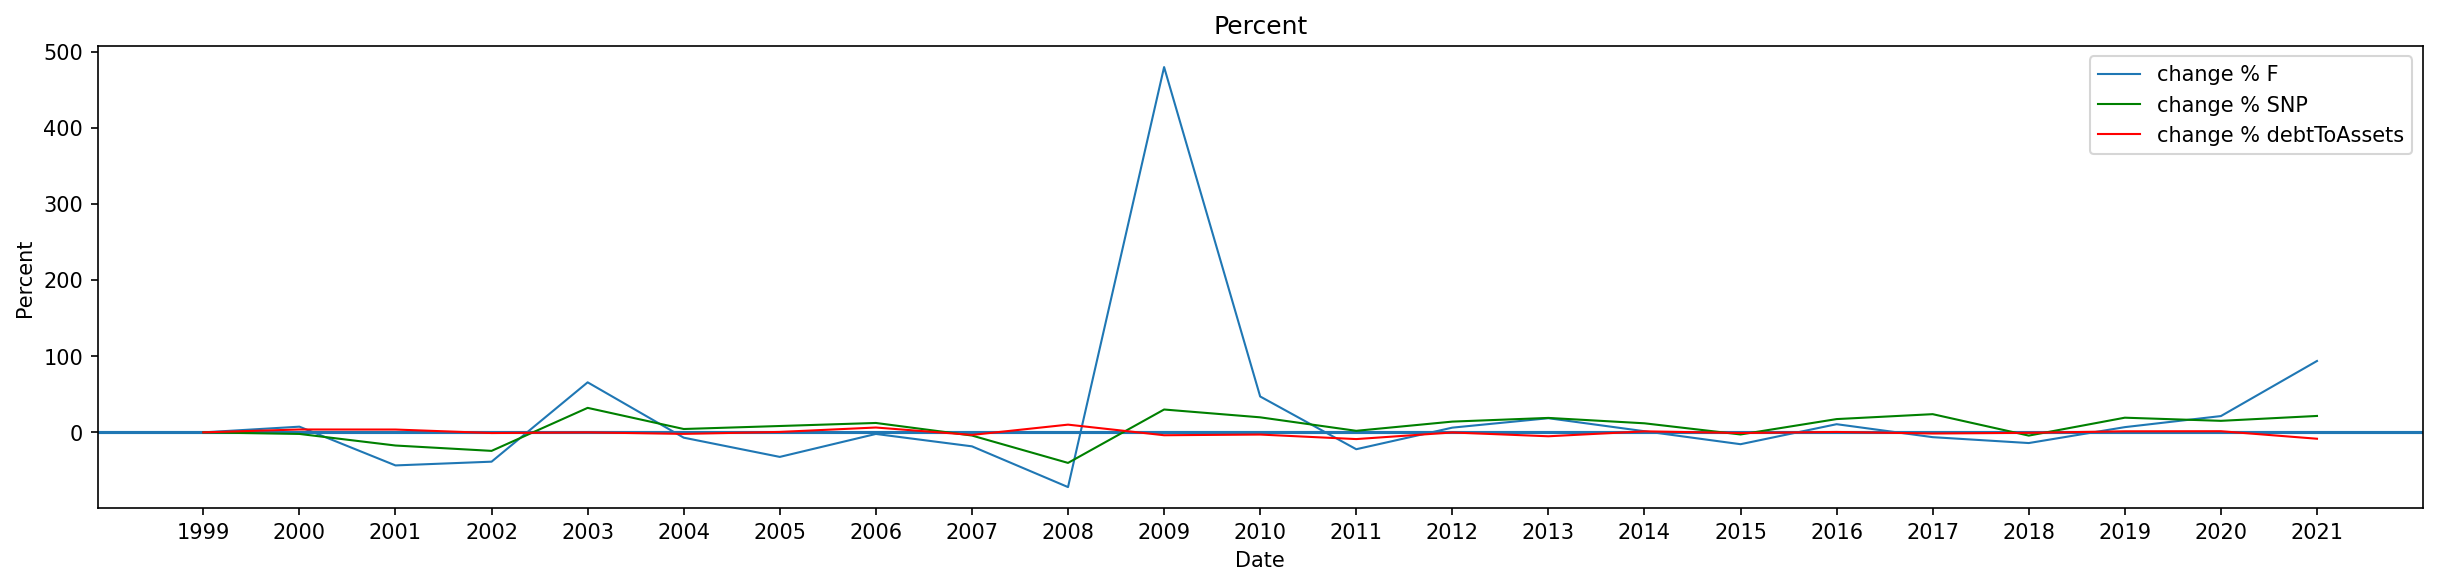

In [14]:
# plot size
figure(figsize=(20,4), dpi=150)
plt.axhline(y=0, linestyle='-')


# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


# Plot 
plt.plot(df_with_changes_key[km1],lw=1, label=km1)
plt.plot(df_with_changes_key[km3],'g',lw=1, label=km3)
plt.plot(df_with_changes_key[km4],'r',lw=1, label=km4)

# Add a legend to the axis
plt.legend()

plt.show()